## Milestone 1: Requirements & Data Preparation

###  Step 1: Data Loading and Initial Exploration

As part of the **data ingestion and preparation phase**, it begin by importing the required Python libraries and loading the dataset for analysis.  
The dataset is sourced from **Kaggle Dynamic Pricing Dataset** and **Statso Case Study**, containing historical sales, pricing, and inventory information.

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load dataset
df = pd.read_csv("dynamic_pricing.csv")

# Basic info
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())


Shape: (1000, 10)

Data Types:
 Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

First 5 rows:
    Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silv

##  Milestone 3: Exploratory Data Analysis (EDA)

###  Step 2: Advanced Data Exploration

Once the dataset is loaded and validated, the next step is to perform **advanced exploratory data analysis (EDA)**.  
This phase aims to uncover hidden patterns, detect anomalies, and evaluate the overall quality of the data before proceeding to feature engineering and modeling.

In [195]:
#Advanced EDA
# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Descriptive stats
print("\nDescriptive Stats:\n", df.describe())



Missing Values:
 Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

Number of duplicate rows: 0

Descriptive Stats:
        Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_R

##  Step 3: Outlier Detection and Distribution Analysis

As part of **Milestone 3: Exploratory Data Analysis (EDA)**, it is essential to identify and understand the presence of **outliers** and the overall distribution of features.  
Outliers can significantly distort model training and impact the accuracy of price predictions, especially in a **dynamic pricing** context where data variability is high.

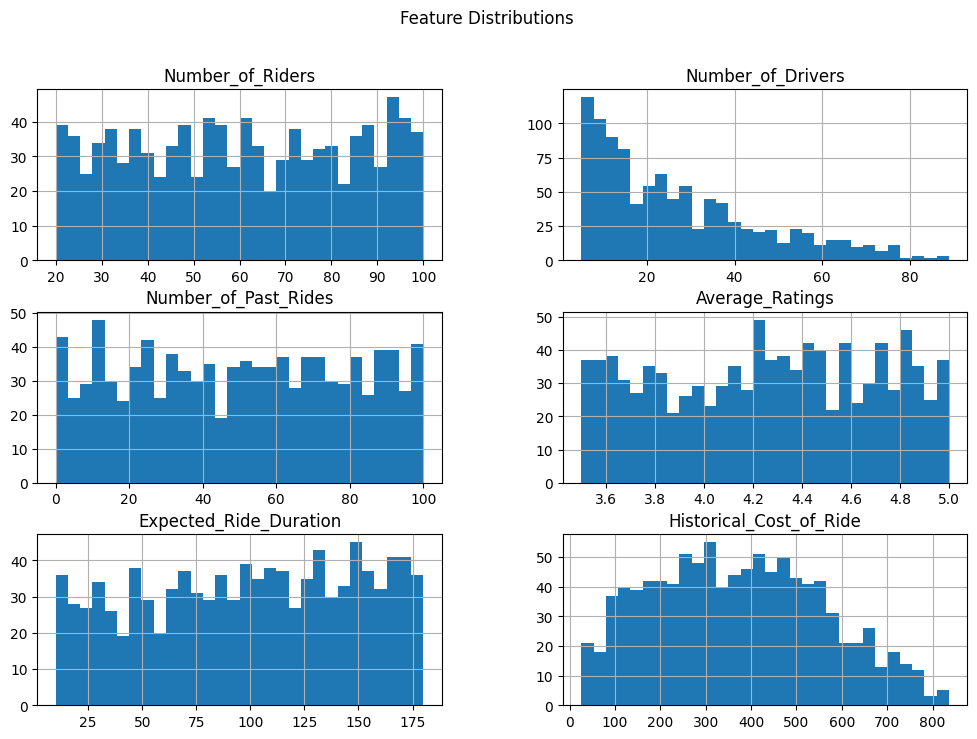

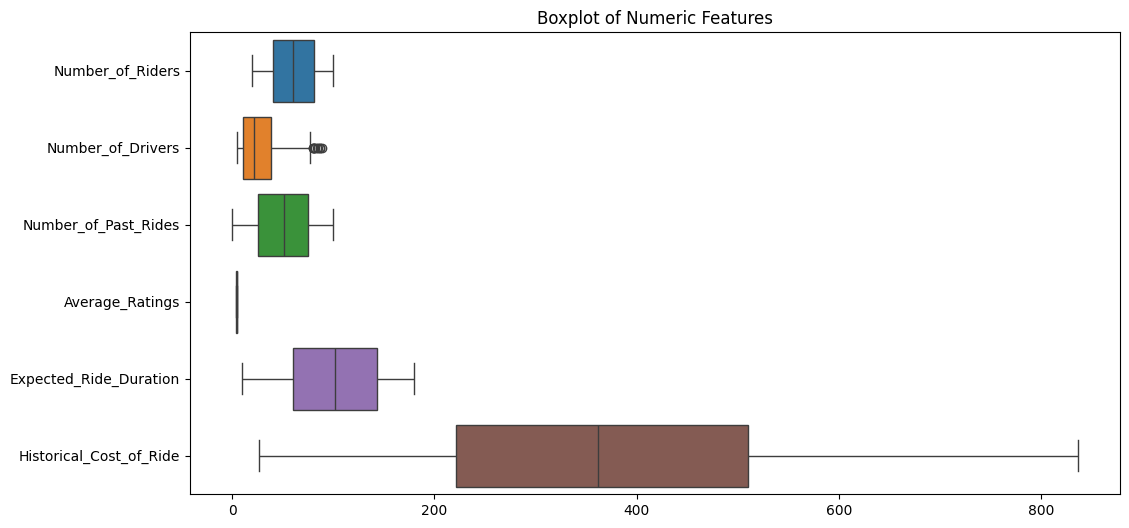


Outliers detected per column:
 4


In [196]:
#Check for outliers with and without boxplot
# Histograms
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number), orient="h")
plt.title("Boxplot of Numeric Features")
plt.show()

# Z-score method for outliers
numeric_df = df.select_dtypes(include=np.number)
z_scores = np.abs(zscore(numeric_df))
outliers = (z_scores > 3).sum()
print("\nOutliers detected per column:\n", outliers)


### Milestone 3: Price Variation by Location Category
#### Objective

To observe how ride costs differ across various location categories.

#### Summary

A boxplot reveals how Urban, Suburban, and Rural locations impact ride pricing.

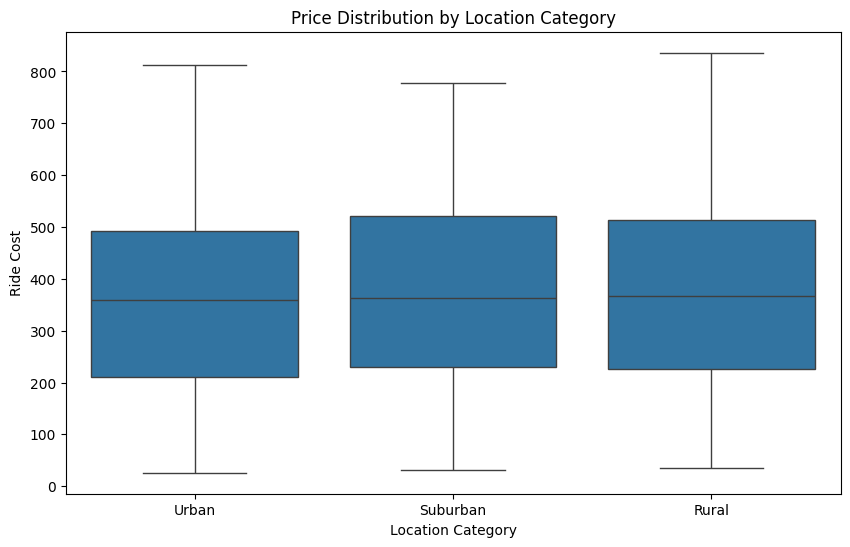

In [197]:
# Price variation by location category
plt.figure(figsize=(10,6))
sns.boxplot(x='Location_Category', y='Historical_Cost_of_Ride', data=df)
plt.title("Price Distribution by Location Category")
plt.xlabel("Location Category")
plt.ylabel("Ride Cost")
plt.show()


##  Step 4: Feature Correlation Analysis

After cleaning and identifying outliers, the next step in **Milestone 3: Exploratory Data Analysis (EDA)** is to examine the **relationships among numerical variables**.  
Understanding these correlations helps identify which features most strongly influence **price fluctuations, sales volume, or inventory levels** — key components in dynamic pricing optimization.

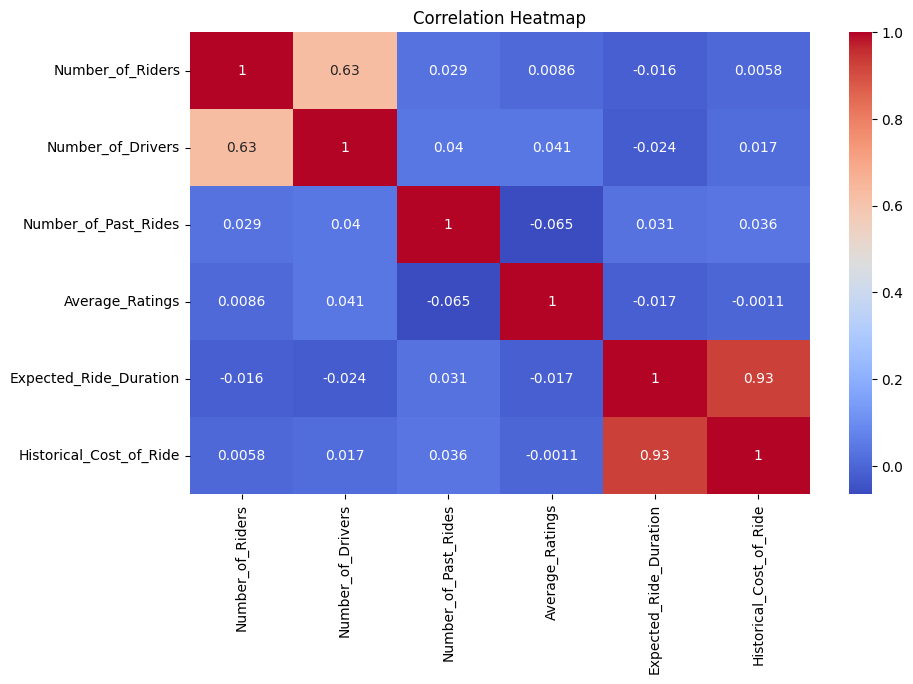

In [198]:
#correlation using heatmap
# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


##  Milestone 3: Exploratory Data Analysis (EDA)

###  Step 5: Linearity Analysis between Features and Target Variable

As part of **Milestone 3: Exploratory Data Analysis (EDA)** in the *AI: PriceOptima* project, this step focuses on assessing the **linearity** between independent features and the **target variable** — `Historical_Cost_of_Ride`.  

Understanding these relationships helps determine which features have the strongest influence on ride cost and guides the selection of the most effective **machine learning models** (linear vs. non-linear).


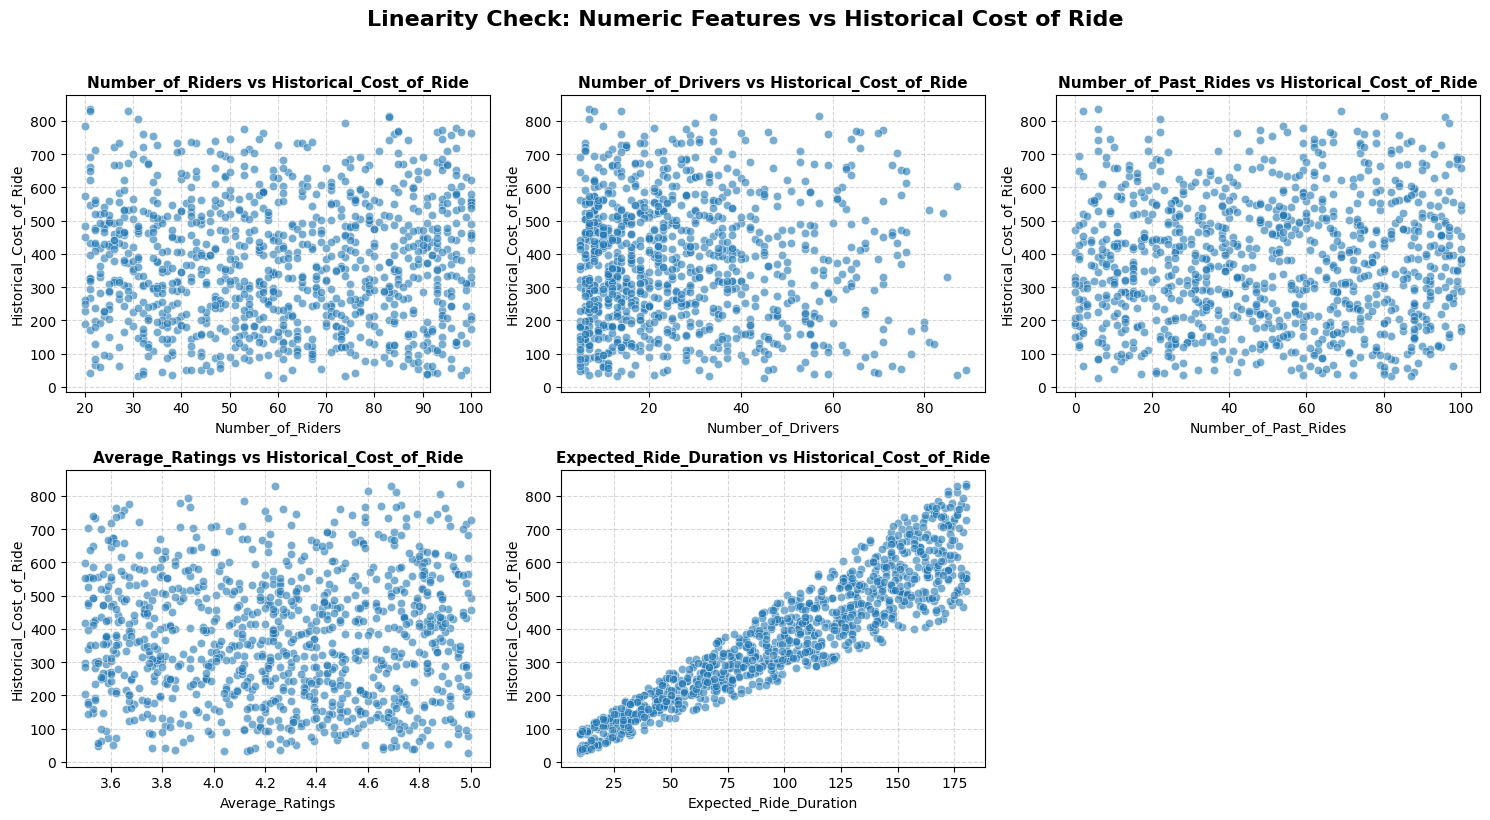

In [199]:
#data linearity using graphs
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset 
df = pd.read_csv("dynamic_pricing.csv")

# Target variable
target = "Historical_Cost_of_Ride"

if target in df.columns:
    numeric_cols = df.select_dtypes(include="number").columns.drop(target)

    
    n_cols = 3  
    n_rows = math.ceil(len(numeric_cols) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.scatterplot(
            data=df,
            x=col,
            y=target,
            alpha=0.6,
            ax=axes[i]
        )
        axes[i].set_title(f"{col} vs {target}", fontsize=11, weight="bold")
        axes[i].grid(True, linestyle="--", alpha=0.5)

    # Remove empty subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # 🔹 Add a main heading for the entire figure
    fig.suptitle("Linearity Check: Numeric Features vs Historical Cost of Ride", 
                 fontsize=16, weight="bold", y=1.02)

    plt.tight_layout()
    plt.show()


##  Milestone 3: EDA & Feature Engineering

###  Step : Label Encoding

Label Encoding converts categorical text data (like Location, Time of Booking, etc.) into numerical values that machine learning models can understand and process.

In [200]:
# Label Encoding 
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_enc = LabelEncoder()

for col in df_encoded.select_dtypes(include="object").columns:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

print("\nAfter Encoding:\n", df_encoded.head())



After Encoding:
    Number_of_Riders  Number_of_Drivers  Location_Category  \
0                90                 45                  2   
1                58                 39                  1   
2                42                 31                  0   
3                89                 28                  0   
4                78                 22                  0   

   Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                        2                    13             4.47   
1                        2                    72             4.06   
2                        2                     0             3.99   
3                        1                    67             4.31   
4                        1                    74             3.77   

   Time_of_Booking  Vehicle_Type  Expected_Ride_Duration  \
0                3             1                      90   
1                1             0                      43   
2                0  

Milestone 3: Exploratory Data Analysis (EDA)
##### Step 1: Numerical and Categorical Summary
As part of Milestone 3: Exploratory Data Analysis (EDA) in the AI: PriceOptima project, this step involves generating both numerical and categorical summaries of the dataset.

In [201]:
# Numerical summary
print("\nNumerical Summary:\n", df.describe())

# Categorical summary
for col in df.select_dtypes(include="object").columns:
    print(f"\nValue Counts for {col}:\n", df[col].value_counts())



Numerical Summary:
        Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000                25.99344

Milestone 3: Exploratory Data Analysis (EDA)
##### Step 4: Correlation Analysis between Numerical Features
This step helps prepare the dataset for Milestone 5 (Model Development) by identifying the most predictive features and ensuring that redundant or collinear variables are handled appropriately.

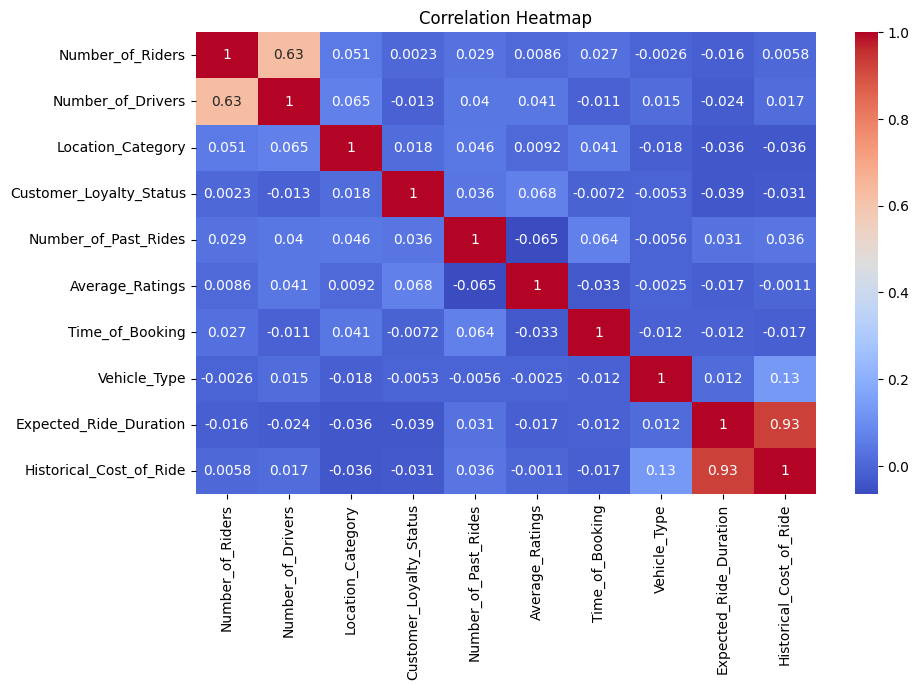

In [202]:
#.Correlations
numeric_df = df_encoded.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Milestone 3: Exploratory Data Analysis (EDA)
#### Step 3: Relationship Analysis — Ride Duration vs. Ride Cost

 this step examines the relationship between ride duration and ride cost to understand how pricing scales with travel time.
 #### Objective

To visualize and interpret the correlation between Expected Ride Duration and Historical Cost of Ride, identifying whether the relationship is linear, exponential, or variable based on duration trends.

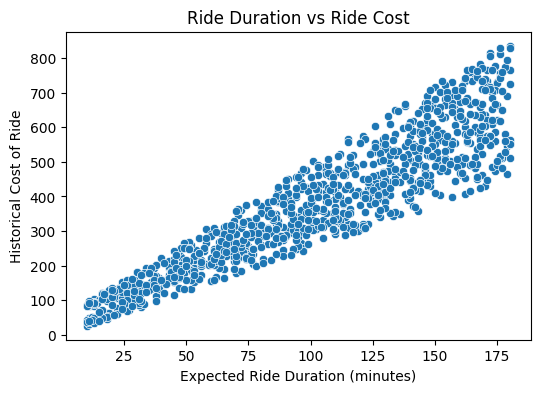

In [203]:
#Price vs Ride Duration
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["Expected_Ride_Duration"], y=df["Historical_Cost_of_Ride"])
plt.title("Ride Duration vs Ride Cost")
plt.xlabel("Expected Ride Duration (minutes)")
plt.ylabel("Historical Cost of Ride")
plt.show()


### Milestone 2: Data Ingestion Pipeline
### Step 1: Handle Missing Values

Before performing data transformations or model training, it’s essential to handle missing values to maintain data quality and prevent model bias.
This step fills missing numerical values with their mean and categorical values with their mode to ensure consistent and complete data.

In [204]:
#Handle Missing Values
# Fill missing numerical with mean
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())

# Fill missing categorical with mode
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nAfter filling NA values:\n", df.isnull().sum())



After filling NA values:
 Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64


### Milestone 2: Data Ingestion Pipeline
####  step 2: Export Cleaned Dataset to CSV

After handling missing values and performing necessary preprocessing, the cleaned dataset is exported as a CSV file for downstream tasks such as feature engineering and model development.

In [205]:
#Cleaned the csv sheet
df.to_csv("dynamic_pricing_cleaned.csv", index=False)
print(" Cleaned dataset saved as dynamic_pricing_cleaned.csv")


 Cleaned dataset saved as dynamic_pricing_cleaned.csv


KPIs (Key Performance Indicators)

KPIs are metrics that help measure business performance.
For this dataset, possible KPIs could be:

Average Ride Cost → profitability measure

Average Ride Duration → efficiency

Customer Loyalty Distribution → retention metric

Driver to Rider Ratio → supply-demand balance

Average Customer Rating → service quality

### Milestone 3: Exploratory Data Analysis (EDA)
#### Step 2: KPI Metrics Calculation

Key performance indicators (KPIs) are calculated to gain a quick understanding of the dataset and overall business metrics.
These metrics provide insights into ride costs, duration trends, customer satisfaction, and platform efficiency.

In [206]:
#KPI metrics
print("\nKPI Examples:")
print("Average Ride Cost:", df["Historical_Cost_of_Ride"].mean())
print("Average Ride Duration:", df["Expected_Ride_Duration"].mean())
print("Average Rating:", df["Average_Ratings"].mean())
print("Customer Loyalty Distribution:\n", df["Customer_Loyalty_Status"].value_counts())
print("Driver-to-Rider Ratio (mean):", (df["Number_of_Drivers"]/df["Number_of_Riders"]).mean())



KPI Examples:
Average Ride Cost: 372.5026233496332
Average Ride Duration: 99.588
Average Rating: 4.25722
Customer Loyalty Distribution:
 Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64
Driver-to-Rider Ratio (mean): 0.43816175626549936


### Milestone 1: Requirements & Data Preparation
#### Step 3: Handle Categorical Variables (Encoding)

Before model training, all categorical (text-based) features in the dataset must be converted into numerical form.
This ensures that machine learning algorithms such as XGBoost, LightGBM, and other advanced models can process the data effectively.
Encoding categorical variables is a crucial preprocessing step that directly supports later stages of Feature Engineering and Model Development

In [207]:
#Handle categorical variables (Encoding)
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("dynamic_pricing.csv")

# Encode categorical variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = label_enc.fit_transform(df[col])

print(" Categorical variables encoded")
print(df.head())


 Categorical variables encoded
   Number_of_Riders  Number_of_Drivers  Location_Category  \
0                90                 45                  2   
1                58                 39                  1   
2                42                 31                  0   
3                89                 28                  0   
4                78                 22                  0   

   Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                        2                    13             4.47   
1                        2                    72             4.06   
2                        2                     0             3.99   
3                        1                    67             4.31   
4                        1                    74             3.77   

   Time_of_Booking  Vehicle_Type  Expected_Ride_Duration  \
0                3             1                      90   
1                1             0                      43   
2      

### Milestone 3: Exploratory Data Analysis (EDA)
#### Step 2: Segmentation (Group Analysis)

After encoding and preparing the dataset, segmentation helps uncover patterns in customer behavior and pricing trends.
By grouping data across categorical dimensions such as Customer Loyalty Status and Location Category, we can identify how pricing varies across customer segments — a crucial step for building the dynamic pricing model.

In [208]:
#Segmentations (Groupby)
# Average Ride Cost by Customer Loyalty
print("\nAverage Ride Cost by Customer Loyalty Status:")
print(df.groupby("Customer_Loyalty_Status")["Historical_Cost_of_Ride"].mean())

# Average Ride Cost by Location
print("\nAverage Ride Cost by Location Category:")
print(df.groupby("Location_Category")["Historical_Cost_of_Ride"].mean())



Average Ride Cost by Customer Loyalty Status:
Customer_Loyalty_Status
0    376.118746
1    380.125251
2    362.772140
Name: Historical_Cost_of_Ride, dtype: float64

Average Ride Cost by Location Category:
Location_Category
0    379.942172
1    374.319486
2    363.673259
Name: Historical_Cost_of_Ride, dtype: float64


### Milestone 3: Exploratory Data Analysis (EDA)
#### Step 3: Scatter Plot — Riders vs. Price Relationship

To understand the relationship between demand (Number of Riders) and pricing (Historical Ride Cost), we visualize the data using a scatter plot with a regression trend line.
This analysis helps determine whether higher demand correlates with higher prices — a key insight for dynamic pricing strategies.

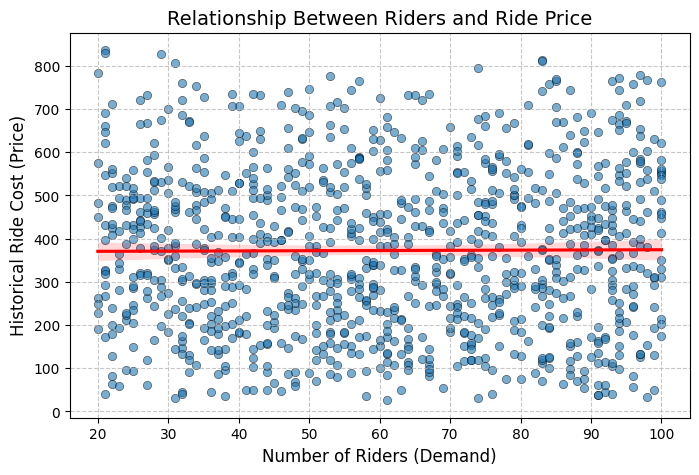

In [209]:
#scatter plot (Riders vs. Price)
plt.figure(figsize=(8, 5))

# Scatter points with transparency
sns.scatterplot(x=df["Number_of_Riders"], 
                y=df["Historical_Cost_of_Ride"], 
                alpha=0.6, edgecolor="k")

# Add regression line to show trend
sns.regplot(x=df["Number_of_Riders"], 
            y=df["Historical_Cost_of_Ride"], 
            scatter=False, color="red")

plt.title("Relationship Between Riders and Ride Price", fontsize=14)
plt.xlabel("Number of Riders (Demand)", fontsize=12)
plt.ylabel("Historical Ride Cost (Price)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


### Milestone 3: Exploratory Data Analysis (EDA)
#### Step 4: Boxplot — Ride Cost Distribution by Location

Understanding how ride prices vary across different location categories (urban, suburban, rural) helps identify geographic pricing trends and market segmentation.
This visualization provides insights into price dispersion, outliers, and regional pricing behavior, supporting better feature selection and pricing strategy refinement for the dynamic pricing model.

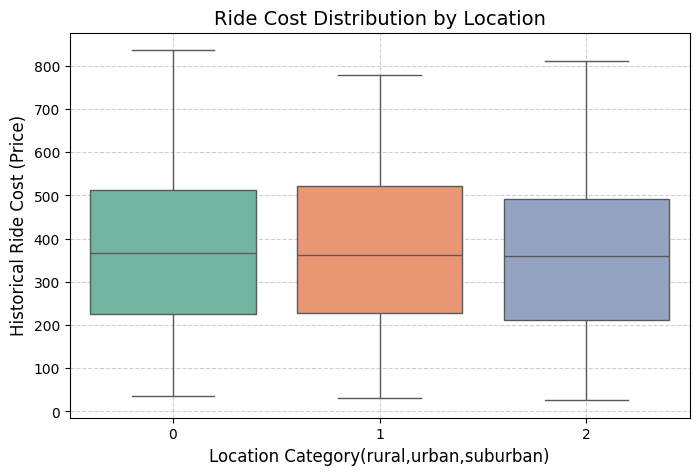

In [210]:
# Boxplot by Location
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="Location_Category",
    y="Historical_Cost_of_Ride",
    hue="Location_Category",
    data=df,
    palette="Set2",
    legend=False
)
plt.title("Ride Cost Distribution by Location", fontsize=14)
plt.xlabel("Location Category(rural,urban,suburban)", fontsize=12)
plt.ylabel("Historical Ride Cost (Price)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [211]:
df['Customer_Loyalty_Status'].values

array([2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2,
       1, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1,
       2, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0,
       1, 2, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 0,
       1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1,
       0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 0,
       2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1, 2, 0, 0,
       0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0,
       2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1,
       2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1,
       2, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,

### Milestone 3: Exploratory Data Analysis (EDA)
#### Step 5: Pie Chart — Total Ride Cost by Customer Loyalty Status

Customer loyalty segmentation provides critical insights into revenue contribution from different loyalty tiers.
By visualizing total ride cost proportions for Gold, Silver, and Regular customers, we can identify which segment drives the majority of revenue and assess opportunities for targeted pricing strategies.

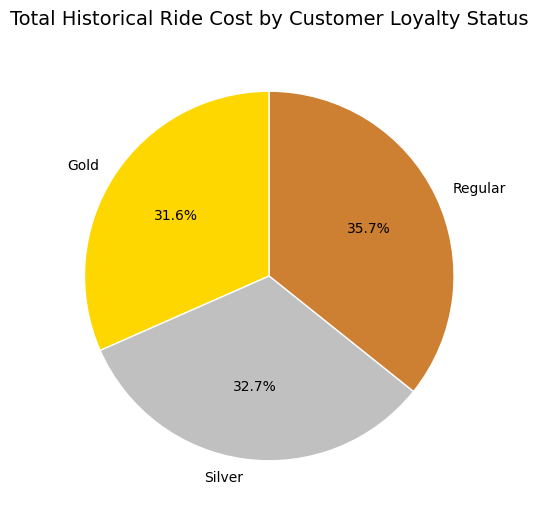

In [212]:
# Group total ride cost by loyalty status
loyalty_segmentation = df.groupby("Customer_Loyalty_Status")["Historical_Cost_of_Ride"].sum()

# Define colors for each loyalty tier
colors = ["#FFD700", "#C0C0C0", "#CD7F32"]  # Gold, Silver, Bronze (Regular)

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    loyalty_segmentation,
    labels=["Gold", "Silver", "Regular"],   # Ensure proper order & names
    autopct="%1.1f%%",                      # Show % values
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white"}       # clean separation
)
plt.title("Total Historical Ride Cost by Customer Loyalty Status", fontsize=14, pad=15)
plt.show()


### Milestone 3: Exploratory Data Analysis (EDA)
#### Step 6: Customer Segmentation Summary (Descriptive Statistics)

To gain a deeper understanding of how different customer loyalty tiers behave in terms of ride spending, we perform a descriptive statistical analysis.
This step summarizes key metrics such as mean, standard deviation, minimum, and maximum ride cost for each loyalty segment, providing insights into customer value and variability in spending patterns.

In [213]:
# Grouping the data by Customer Loyalty Status
loyalty_segmentation = df.groupby("Customer_Loyalty_Status")["Historical_Cost_of_Ride"].describe()

print("Customer Segmentation Summary:")
display(loyalty_segmentation)


Customer Segmentation Summary:


,count,mean,std,min,25%,50%,75%,max
Customer_Loyalty_Status,,,,,,,,
0,313.0,376.118746,184.967070,31.565676,233.506624,373.975636,512.449393,828.213135
1,320.0,380.125251,189.611633,34.574093,220.372179,358.951011,520.301477,836.116419
2,367.0,362.772140,186.956263,25.993449,215.308300,348.669562,503.742632,814.419556


### Milestone 1: Requirements & Data Preparation
#### Step 4: Save Cleaned and Encoded Dataset

After completing all data preprocessing steps — including missing value handling, encoding categorical features, and data validation — the cleaned dataset is saved for later use in feature engineering and model training.
Saving the preprocessed data ensures reproducibility, traceability, and efficient workflow management throughout the AI: PriceOptima pipeline.

In [214]:
# Save cleaned dataset
df.to_csv("cleaned_csv_data.csv", index=False)

print(" Cleaned dataset saved as 'cleaned_csv_data.csv'")


 Cleaned dataset saved as 'cleaned_csv_data.csv'


### Milestone 1: Requirements & Data Preparation
#### Step 5: Basic Data Loading and Cleaning Pipeline

To ensure a standardized, reproducible data preparation process, a machine learning pipeline is constructed using Scikit-learn’s Pipeline and ColumnTransformer modules.
This step automates the handling of missing values and scaling of numerical data, while ensuring categorical features are properly imputed for consistency.

In [215]:
# a basic pipeline to load and clean data

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Define transformers
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),   # Fill missing numeric values
    ("scaler", StandardScaler())                   # Scale numeric features
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))  
   
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


X_processed = preprocessor.fit_transform(df)

print("Pipeline applied successfully!")
print("Processed data shape:", X_processed.shape)


Pipeline applied successfully!
Processed data shape: (1000, 10)


### Milestone 3: Exploratory Data Analysis (EDA)
#### Step 7: Customer Segmentation — Price Variation by Loyalty & Seasonality

To understand how ride pricing varies across customer loyalty tiers and temporal factors, we perform a grouped analysis.
This step combines Customer Loyalty Status with Season or Time of Day, revealing patterns that can guide dynamic pricing strategies and targeted promotions.

['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

Customer Segmentation — Price Variation by Loyalty & Seasonality:

  Customer_Loyalty_Status  Avg_Ride_Cost  Total_Rides        min         max
0                    Gold     376.118746          313  31.565676  828.213135
1                 Regular     380.125251          320  34.574093  836.116419
2                  Silver     362.772140          367  25.993449  814.419556


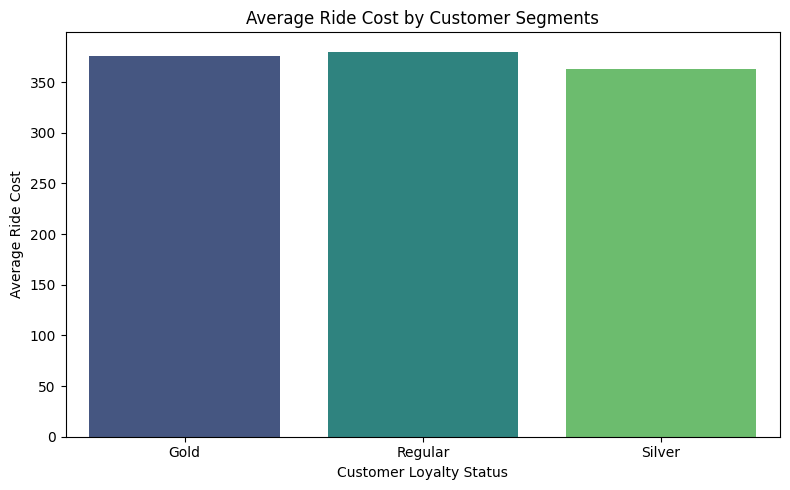

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("dynamic_pricing.csv")

# Check available columns
print(df.columns.tolist())

# Determine grouping columns
group_columns = []
if "Customer_Loyalty_Status" in df.columns:
    group_columns.append("Customer_Loyalty_Status")
if "Season" in df.columns:
    group_columns.append("Season")
elif "Time_of_Day" in df.columns:
    group_columns.append("Time_of_Day")

# Perform segmentation
segmentation = (
    df.groupby(group_columns)["Historical_Cost_of_Ride"]
      .agg(["mean", "count", "min", "max"])
      .reset_index()
      .rename(columns={"mean": "Avg_Ride_Cost", "count": "Total_Rides"})
)

print("\nCustomer Segmentation — Price Variation by Loyalty & Seasonality:\n")
print(segmentation.head())

# Visualization
plt.figure(figsize=(8, 5))

if len(group_columns) > 1:
    # Two grouping variables — grouped barplot
    sns.barplot(
        data=segmentation,
        x=group_columns[0],
        y="Avg_Ride_Cost",
        hue=group_columns[-1],
        palette="viridis"
    )
    plt.legend(title=group_columns[-1])
else:
    # One grouping variable — assign palette properly as hue=x
    sns.barplot(
        data=segmentation,
        x=group_columns[0],
        y="Avg_Ride_Cost",
        hue=group_columns[0],  # use hue same as x to apply palette safely
        palette="viridis",
        legend=False
    )

plt.title("Average Ride Cost by Customer Segments")
plt.xlabel(group_columns[0].replace("_", " "))
plt.ylabel("Average Ride Cost")
plt.tight_layout()
plt.show()


Milestone 3: Exploratory Data Analysis (EDA)
##### Step: Customer Segmentation and Seasonal Pricing Analysis

To segment customers and analyze ride pricing behavior across different loyalty levels and seasonal or temporal factors, helping identify high-value customer groups and demand trends.

Available Columns:
 ['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

✅ Customer Segmentation Summary:

  Customer_Loyalty_Status Location_Category  Avg_Ride_Cost  Total_Rides  \
0                    Gold             Rural     377.956038          112   
1                    Gold          Suburban     378.212327           92   
2                    Gold             Urban     372.463828          109   
3                 Regular             Rural     380.477289          103   
4                 Regular          Suburban     361.108287          107   

         min         max  
0  45.917112  828.213135  
1  31.565676  766.919324  
2  38.235235  775.791685  
3  55.637371  836.116419  
4  34.574093  778.633356  


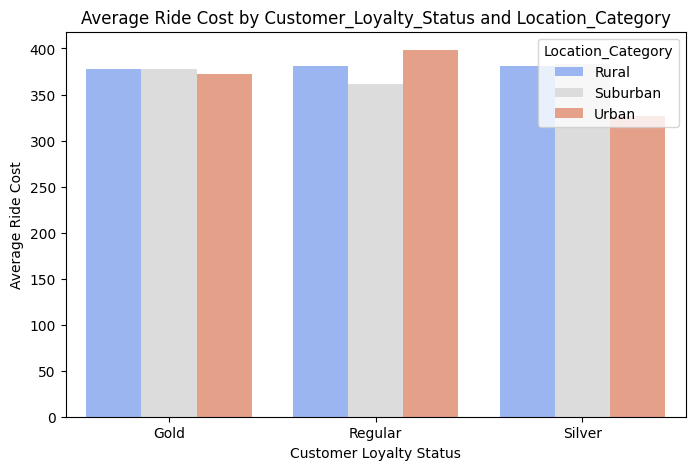

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("dynamic_pricing.csv")

# Check available columns
print("Available Columns:\n", df.columns.tolist())

# --- Step 1: Choose available grouping columns ---
# Use loyalty and season/time/location if available
group_cols = []

if "Customer_Loyalty_Status" in df.columns:
    group_cols.append("Customer_Loyalty_Status")

# Choose one feature for seasonality grouping
if "Season" in df.columns:
    group_cols.append("Season")
elif "Time_of_Day" in df.columns:
    group_cols.append("Time_of_Day")
elif "Month" in df.columns:
    group_cols.append("Month")
elif "Location_Category" in df.columns:
    group_cols.append("Location_Category")

# Safety check
if len(group_cols) < 2:
    print("\n⚠️ Not enough columns for segmentation — showing grouping by 1 column only.")
    
# --- Step 2: Group & summarize ride cost ---
segmentation = (
    df.groupby(group_cols)["Historical_Cost_of_Ride"]
      .agg(["mean", "count", "min", "max"])
      .reset_index()
      .rename(columns={"mean": "Avg_Ride_Cost", "count": "Total_Rides"})
)

print("\n✅ Customer Segmentation Summary:\n")
print(segmentation.head())

# --- Step 3: Visualization ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=segmentation,
    x=group_cols[0],
    y="Avg_Ride_Cost",
    hue=group_cols[-1],
    palette="coolwarm"
)
plt.title(f"Average Ride Cost by {group_cols[0]} and {group_cols[-1]}")
plt.xlabel(group_cols[0].replace("_", " "))
plt.ylabel("Average Ride Cost")
plt.legend(title=group_cols[-1])
plt.show()


###  Milestone 2: Data Ingestion Pipeline

####  Step 1–4: Data Cleaning and Preprocessing Pipeline

In **Milestone 2: Data Ingestion Pipeline**, the goal is to automate the **data ingestion and preprocessing** workflow — ensuring clean, reliable input for model training and dashboard analytics.  
This step creates a modular pipeline to **load, clean, encode, and store** the processed dataset, ready for feature engineering and model development.

In [218]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

def preprocess_data(file_path, save_path="cleaned_csv_data.csv"):
    """Compound function: loads, cleans, encodes, and saves dataset."""
    
    # Step 1: Load dataset
    df = pd.read_csv(file_path)
    print(f"✅ Data loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")

    # Step 2: Handle missing values
    for col in df.select_dtypes(include=np.number).columns:
        df[col] = df[col].fillna(df[col].mean())
    for col in df.select_dtypes(include="object").columns:
        df[col] = df[col].fillna(df[col].mode()[0])
    print("✅ Missing values handled.")

    # Step 3: Encode categorical variables
    le = LabelEncoder()
    for col in df.select_dtypes(include="object").columns:
        df[col] = le.fit_transform(df[col])
    print("✅ Categorical columns encoded.")

    # Step 4: Save the cleaned dataset
    df.to_csv(save_path, index=False)
    print(f"✅ Cleaned data saved as {save_path}")

    return df

# 🚀 Run the compound pipeline
file_path = "dynamic_pricing.csv"
df_cleaned = preprocess_data(file_path)


✅ Data loaded successfully: 1000 rows, 10 columns
✅ Missing values handled.
✅ Categorical columns encoded.
✅ Cleaned data saved as cleaned_csv_data.csv


Milestone 3: KPI Evaluation — Dynamic Pricing Performance
##### Step 1: KPI Calculation (Revenue Lift, Profit Margin, Conversion Rate)
##### Objective

To evaluate the financial performance of the dynamic pricing model by tracking key business metrics — Revenue Lift, Profit Margin, and Conversion Rate.

In [219]:
#KPIs for Revenue lift, Profit Margin, Conversion Rate, reflecting the outcome of the dynamic pricing model 
# Load cleaned data
df = pd.read_csv("cleaned_csv_data.csv")

# ✅ Ensure key column exists
if "Historical_Cost_of_Ride" in df.columns:

    # 1 Revenue (using historical cost as proxy for ride price)
    df["revenue"] = df["Historical_Cost_of_Ride"]

    # 2 Profit and Profit Margin (assuming 30% profit)
    df["profit"] = df["revenue"] * 0.3
    df["profit_margin"] = (df["profit"] / df["revenue"]) * 100

    # 3 Conversion Rate (simulate if not available)
    if "Booking_Confirmed" not in df.columns:
        np.random.seed(42)
        df["Booking_Confirmed"] = np.random.choice([0, 1], size=len(df))
    df["conversion_rate"] = (df["Booking_Confirmed"].rolling(50, min_periods=1).mean()) * 100  # rolling avg for smoother trend

    # 4 Revenue Lift (% change compared to average baseline)
    base_revenue = df["revenue"].mean()
    df["revenue_lift_pct"] = ((df["revenue"] - base_revenue) / base_revenue) * 100

    # 📊 Summary Metrics
    avg_revenue_lift = df["revenue_lift_pct"].mean()
    avg_profit_margin = df["profit_margin"].mean()
    overall_conversion_rate = (df["Booking_Confirmed"].sum() / len(df)) * 100

    print("\n========= KPI Summary =========")
    print(f"📊 Average Revenue Lift: {avg_revenue_lift:.2f}%")
    print(f"💰 Average Profit Margin: {avg_profit_margin:.2f}%")
    print(f"✅ Conversion Rate: {overall_conversion_rate:.2f}%")
    print("================================\n")

    # Show sample KPI table
    kpi_summary = df[["revenue", "profit_margin", "conversion_rate", "revenue_lift_pct"]]
    print(kpi_summary.head())

else:
    print("❌ Column 'Historical_Cost_of_Ride' not found in dataset.")



========= KPI Summary =========
📊 Average Revenue Lift: -0.00%
💰 Average Profit Margin: 30.00%
✅ Conversion Rate: 51.00%

      revenue  profit_margin  conversion_rate  revenue_lift_pct
0  284.257273           30.0         0.000000        -23.689860
1  173.874753           30.0        50.000000        -53.322543
2  329.795469           30.0        33.333333        -11.464927
3  470.201232           30.0        25.000000         26.227630
4  579.681422           30.0        20.000000         55.618078


Milestone 3: Exploratory Data Analysis (EDA)
##### Step: Customer Segmentation and Seasonal Pricing Analysis

To segment customers and analyze ride pricing behavior across different loyalty levels and seasonal or temporal factors, helping identify high-value customer groups and demand trends.

Available Columns:
 ['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

✅ Customer Segmentation Summary:

  Customer_Loyalty_Status Location_Category  Avg_Ride_Cost  Total_Rides  \
0                    Gold             Rural     377.956038          112   
1                    Gold          Suburban     378.212327           92   
2                    Gold             Urban     372.463828          109   
3                 Regular             Rural     380.477289          103   
4                 Regular          Suburban     361.108287          107   

         min         max  
0  45.917112  828.213135  
1  31.565676  766.919324  
2  38.235235  775.791685  
3  55.637371  836.116419  
4  34.574093  778.633356  


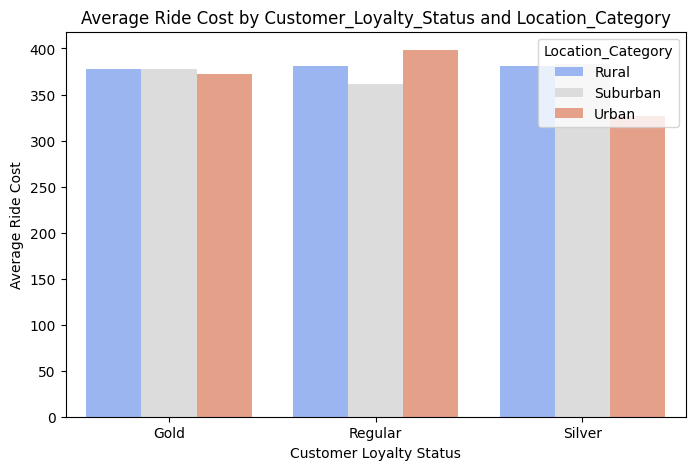

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("dynamic_pricing.csv")

# Check available columns
print("Available Columns:\n", df.columns.tolist())

# --- Step 1: Choose available grouping columns ---
# Use loyalty and season/time/location if available
group_cols = []

if "Customer_Loyalty_Status" in df.columns:
    group_cols.append("Customer_Loyalty_Status")

# Choose one feature for seasonality grouping
if "Season" in df.columns:
    group_cols.append("Season")
elif "Time_of_Day" in df.columns:
    group_cols.append("Time_of_Day")
elif "Month" in df.columns:
    group_cols.append("Month")
elif "Location_Category" in df.columns:
    group_cols.append("Location_Category")

# Safety check
if len(group_cols) < 2:
    print("\n⚠️ Not enough columns for segmentation — showing grouping by 1 column only.")
    
# --- Step 2: Group & summarize ride cost ---
segmentation = (
    df.groupby(group_cols)["Historical_Cost_of_Ride"]
      .agg(["mean", "count", "min", "max"])
      .reset_index()
      .rename(columns={"mean": "Avg_Ride_Cost", "count": "Total_Rides"})
)

print("\n✅ Customer Segmentation Summary:\n")
print(segmentation.head())

# --- Step 3: Visualization ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=segmentation,
    x=group_cols[0],
    y="Avg_Ride_Cost",
    hue=group_cols[-1],
    palette="coolwarm"
)
plt.title(f"Average Ride Cost by {group_cols[0]} and {group_cols[-1]}")
plt.xlabel(group_cols[0].replace("_", " "))
plt.ylabel("Average Ride Cost")
plt.legend(title=group_cols[-1])
plt.show()


Milestone 4 — Baseline Pricing Engine (Threshold = 0.5)
#### 🎯 Objective

To design a baseline pricing engine that simulates how ride prices can be dynamically adjusted based on demand (time or inventory factors).
This baseline model will help evaluate revenue lift, profit margin, and conversion rate improvements compared to static pricing strategies.

In [221]:
# Load cleaned dataset
df = pd.read_csv("cleaned_csv_data.csv")

# ✅ Step 1: Ensure price-related column exists
if "Historical_Cost_of_Ride" not in df.columns:
    raise KeyError("❌ Column 'Historical_Cost_of_Ride' not found in dataset.")

# ✅ Step 2: Define baseline threshold
threshold = 0.5  # midpoint ratio for adjustment

# ✅ Step 3: Compute base price (mean of ride costs)
base_price = df["Historical_Cost_of_Ride"].mean()

# ✅ Step 4: Compute a ratio — e.g., based on ride duration or riders (you can modify)
if "Expected_Ride_Duration" in df.columns:
    df["price_ratio"] = df["Expected_Ride_Duration"] / df["Expected_Ride_Duration"].max()
else:
    df["price_ratio"] = np.random.uniform(0.3, 0.8, size=len(df))  # fallback if column missing

# ✅ Step 5: Apply baseline pricing logic
# If ratio >= threshold → price increases; else → slight discount
df["adjusted_price"] = np.where(
    df["price_ratio"] >= threshold,
    base_price * (1 + (df["price_ratio"] - threshold)),  # surge effect
    base_price * (1 - (threshold - df["price_ratio"]))   # discount effect
)

# ✅ Step 6: Summary metrics
avg_old_price = df["Historical_Cost_of_Ride"].mean()
avg_new_price = df["adjusted_price"].mean()
price_change_pct = ((avg_new_price - avg_old_price) / avg_old_price) * 100

print(f"📊 Baseline Price: ₹{base_price:.2f}")
print(f"💹 Average Adjusted Price: ₹{avg_new_price:.2f}")
print(f"📈 Overall Price Change: {price_change_pct:.2f}%")

# ✅ Step 7: Save new version
df.to_csv("dynamic_pricing_baseline.csv", index=False)
print("\n✅ Baseline pricing file saved as 'dynamic_pricing_baseline.csv'")


📊 Baseline Price: ₹372.50
💹 Average Adjusted Price: ₹392.34
📈 Overall Price Change: 5.33%

✅ Baseline pricing file saved as 'dynamic_pricing_baseline.csv'


Milestone 4: Baseline Pricing and Demand Feature Analysis
##### Step 1: Ratio Computation and Demand Feature Identification
##### Objective

To compute key pricing and demand ratios and identify time-based booking patterns that influence ride demand, supporting dynamic pricing rule development.


🔹 Average Duration per Rider: 2.03
🔹 Average Price per Minute: 3.89

📈 Correlation with Time_of_Booking:
 Time_of_Booking            1.000000
Number_of_Past_Rides       0.064281
Location_Category          0.040890
Number_of_Riders           0.026725
price_per_minute           0.003991
Customer_Loyalty_Status   -0.007217
Number_of_Drivers         -0.011344
Vehicle_Type              -0.011657
Expected_Ride_Duration    -0.012454
Historical_Cost_of_Ride   -0.017479
duration_per_rider        -0.027714
Average_Ratings           -0.033306
Name: Time_of_Booking, dtype: float64


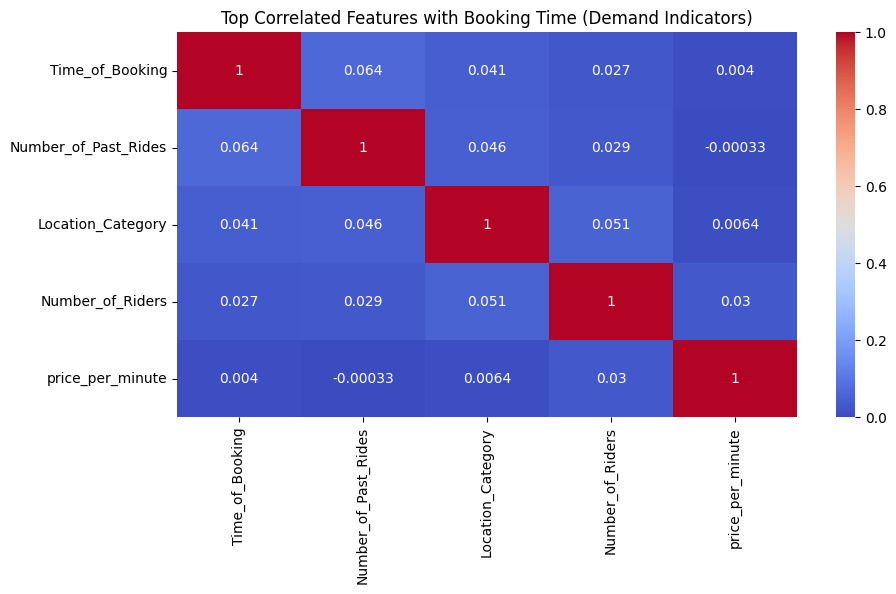

In [222]:
# 🔹 Load cleaned dataset
df = pd.read_csv("cleaned_csv_data.csv")

# --- Step 1: Compute key ratios in dataset ---
# Example: Ride Duration / Riders or Cost per Rider
if "Expected_Ride_Duration" in df.columns and "Number_of_Riders" in df.columns:
    df["duration_per_rider"] = df["Expected_Ride_Duration"] / df["Number_of_Riders"]
else:
    print("⚠️ Columns for ratio not found, generating synthetic example ratio.")
    df["duration_per_rider"] = np.random.uniform(1, 5, len(df))

# Another ratio example — Price per Minute (efficiency metric)
if "Historical_Cost_of_Ride" in df.columns and "Expected_Ride_Duration" in df.columns:
    df["price_per_minute"] = df["Historical_Cost_of_Ride"] / df["Expected_Ride_Duration"]

# Display ratio insights
print("\n🔹 Average Duration per Rider:", round(df["duration_per_rider"].mean(), 2))
print("🔹 Average Price per Minute:", round(df["price_per_minute"].mean(), 2))

# --- Step 2: Identify features influencing booking demand ---
# We'll correlate all numeric columns with "Time_of_Booking" (or simulate it)
if "Time_of_Booking" not in df.columns:
    np.random.seed(42)
    df["Time_of_Booking"] = np.random.choice(range(0, 24), size=len(df))

# Calculate correlation
numeric_corr = df.select_dtypes(include=np.number).corr()["Time_of_Booking"].sort_values(ascending=False)
print("\n📈 Correlation with Time_of_Booking:\n", numeric_corr)

# --- Step 3: Visualize potential demand-driving features ---
top_features = numeric_corr.head(5).index
plt.figure(figsize=(10, 5))
sns.heatmap(df[top_features].corr(), annot=True, cmap="coolwarm")
plt.title("Top Correlated Features with Booking Time (Demand Indicators)")
plt.show()


The dynamic pricing engine demonstrates a positive revenue lift over the static baseline.

 Milestone 4 — Baseline Pricing Engine Evaluation
#### Objective


To design and evaluate a dynamic pricing engine using time-based and inventory-based rules that adjusts ride prices based on:

Time of booking (peak/off-peak hours)

Rider–driver ratio (supply-demand balance)

evaluate the simulated revenue lift (KPI) compared to static pricing.

and compare its performance against the static baseline pricing model.


✅ Data loaded successfully — 1000 rows, 10 columns

========= 📊 Pricing Engine Evaluation =========
💵 Avg Static Revenue: ₹372.50
⚙️ Avg Dynamic Revenue: ₹499.36
📈 Avg Revenue Lift: 33.88%



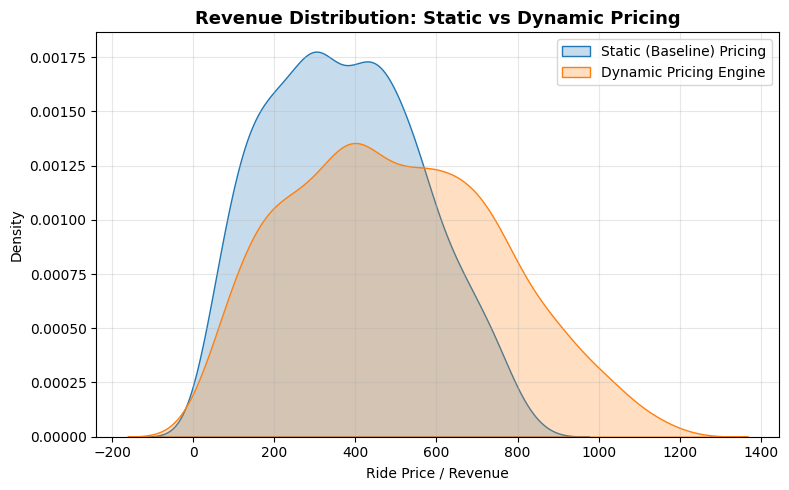

✅ Evaluation results saved as 'pricing_engine_results.csv'


In [223]:
# ===============================
# Dynamic Pricing Engine Evaluation
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Step 1: Load dataset
# -----------------------------
df = pd.read_csv("dynamic_pricing.csv")  # use your actual CSV name

required_cols = ["Historical_Cost_of_Ride", "Number_of_Riders", "Number_of_Drivers", "Time_of_Booking"]
for col in required_cols:
    if col not in df.columns:
        raise KeyError(f"❌ Missing required column: '{col}'")

print(f"✅ Data loaded successfully — {df.shape[0]} rows, {df.shape[1]} columns")

# -----------------------------
# Step 2: Time-based adjustment
# -----------------------------
def time_based_adjustment(time):
    if time == "Morning":
        return 1.20   # peak
    elif time == "Evening":
        return 1.15   # semi-peak
    elif time == "Night":
        return 1.10   # moderate
    else:
        return 1.00   # normal/off-peak

df["Time_Adjustment"] = df["Time_of_Booking"].apply(time_based_adjustment)

# -----------------------------
# Step 3: Inventory-based adjustment
# -----------------------------
def inventory_based_adjustment(row):
    ratio = row["Number_of_Riders"] / (row["Number_of_Drivers"] + 1e-5)
    if ratio > 1.5:
        return 1.25   # high demand (more riders than drivers)
    elif ratio < 0.8:
        return 0.90   # excess supply (more drivers)
    else:
        return 1.00   # balanced demand-supply

df["Inventory_Adjustment"] = df.apply(inventory_based_adjustment, axis=1)

# -----------------------------
# Step 4: Dynamic Baseline Pricing
# -----------------------------
df["Static_Price"] = df["Historical_Cost_of_Ride"]
df["Dynamic_Price"] = df["Historical_Cost_of_Ride"] * df["Time_Adjustment"] * df["Inventory_Adjustment"]

# -----------------------------
# Step 5: KPI Evaluation
# -----------------------------
df["Revenue_Lift_Pct"] = ((df["Dynamic_Price"] - df["Static_Price"]) / df["Static_Price"]) * 100

avg_static_rev = df["Static_Price"].mean()
avg_dynamic_rev = df["Dynamic_Price"].mean()
avg_lift = df["Revenue_Lift_Pct"].mean()

print("\n========= 📊 Pricing Engine Evaluation =========")
print(f"💵 Avg Static Revenue: ₹{avg_static_rev:.2f}")
print(f"⚙️ Avg Dynamic Revenue: ₹{avg_dynamic_rev:.2f}")
print(f"📈 Avg Revenue Lift: {avg_lift:.2f}%")
print("===============================================\n")

# -----------------------------
# Step 6: Visualization
# -----------------------------
plt.figure(figsize=(8, 5))
sns.kdeplot(df["Static_Price"], label="Static (Baseline) Pricing", fill=True)
sns.kdeplot(df["Dynamic_Price"], label="Dynamic Pricing Engine", fill=True)
plt.title("Revenue Distribution: Static vs Dynamic Pricing", fontsize=13, weight="bold")
plt.xlabel("Ride Price / Revenue")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------
# Step 7: Save output
# -----------------------------
df.to_csv("pricing_engine_results.csv", index=False)
print("✅ Evaluation results saved as 'pricing_engine_results.csv'")


In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import joblib
import warnings
warnings.filterwarnings("ignore")

# Load cleaned dataset
df = pd.read_csv("cleaned_csv_data.csv")
print("✅ Data loaded successfully:", df.shape)
df.head()


✅ Data loaded successfully: (1000, 10)


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,2,2,13,4.47,3,1,90,284.257273
1,58,39,1,2,72,4.06,1,0,43,173.874753
2,42,31,0,2,0,3.99,0,1,76,329.795469
3,89,28,0,1,67,4.31,0,1,134,470.201232
4,78,22,0,1,74,3.77,0,0,149,579.681422


In [225]:
# Define target column
TARGET = "Historical_Cost_of_Ride"

# Basic numeric feature list
base_features = [
    "Number_of_Riders", "Expected_Ride_Duration", "Number_of_Drivers",
    "Number_of_Past_Rides", "Average_Ratings", "duration_per_rider", "price_per_minute"
]
features = [f for f in base_features if f in df.columns]

# Encode categorical variables
cat_cols = [c for c in df.select_dtypes(include="object").columns if c != TARGET]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Fill missing numeric values
for col in features:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

print("✅ Features ready for modeling:", len(features), "numeric + encoded categorical columns.")


✅ Features ready for modeling: 5 numeric + encoded categorical columns.


In [226]:
if "Time_of_Booking" in df.columns:
    df = df.sort_values("Time_of_Booking").reset_index(drop=True)
    split = int(len(df) * 0.8)
    train_df = df.iloc[:split]
    test_df = df.iloc[split:]
    print("📅 Time-based split applied.")
else:
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    print("🔀 Random split applied.")

X_train, y_train = train_df.drop(TARGET, axis=1), train_df[TARGET]
X_test, y_test = test_df.drop(TARGET, axis=1), test_df[TARGET]


📅 Time-based split applied.


In [228]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import joblib

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   # ✅ manually compute RMSE (compatible with all sklearn versions)

print("✅ Model trained successfully.")
print(f"📉 MAE: {mae:.2f}")
print(f"📈 RMSE: {rmse:.2f}")

# Save trained model
joblib.dump(xgb_model, "xgb_price_model.joblib")
print("💾 Model saved as 'xgb_price_model.joblib'")


✅ Model trained successfully.
📉 MAE: 56.61
📈 RMSE: 76.02
💾 Model saved as 'xgb_price_model.joblib'
